In [1]:
# install pycaret
!pip install pycaret

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [3]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
digi_currancy_fpath = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments2/dc.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# read data
import pandas as pd
dc_data = pd.read_csv(digi_currancy_fpath)

# check data
dc_data.shape

(1000, 10)

<Axes: >

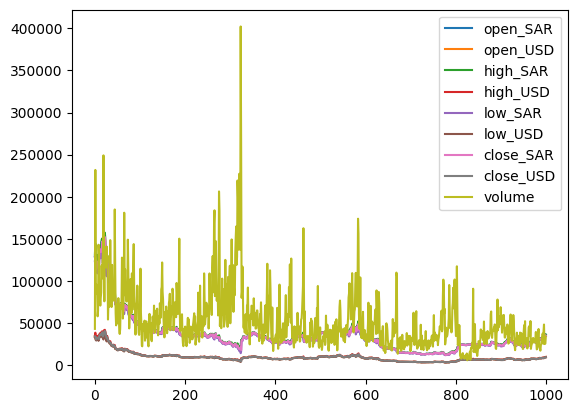

In [5]:
# plot the dataset
dc_data.plot()

In [6]:
# review data stats
dc_data.describe

<bound method NDFrame.describe of            Date       open_SAR  open_USD       high_SAR  high_USD  \
0    2021-01-30  128437.248512  34246.28  131012.723200  34933.00   
1    2021-01-29  125144.022272  33368.18  144510.037760  38531.90   
2    2021-01-28  113870.357376  30362.19  126703.438592  33783.98   
3    2021-01-27  121753.023104  32464.01  122102.860416  32557.29   
4    2021-01-26  120966.114176  32254.19  123470.218752  32921.88   
..          ...            ...       ...            ...       ...   
995  2018-05-11   33761.888384   9002.21   33816.606720   9016.80   
996  2018-05-10   34916.224000   9310.00   35235.458048   9395.12   
997  2018-05-09   34421.171200   9178.00   35216.256000   9390.00   
998  2018-05-08   35122.496000   9365.00   35537.665280   9475.70   
999  2018-05-07   36232.689408   9661.02   36340.138368   9689.67   

           low_SAR   low_USD      close_SAR  close_USD  volume  
0    123106.880000  32825.00  128333.212416   34218.54   43072  
1    11

In [7]:
dc_data['Date']=pd.to_datetime(dc_data['Date'])
dc_data = dc_data.drop(columns=['open_SAR', 'high_SAR','low_SAR','close_SAR'], axis=1)
dc_data.describe

<bound method NDFrame.describe of           Date  open_USD  high_USD   low_USD  close_USD  volume
0   2021-01-30  34246.28  34933.00  32825.00   34218.54   43072
1   2021-01-29  33368.18  38531.90  31915.40   34252.20  231827
2   2021-01-28  30362.19  33783.98  29842.10   33364.86   92621
3   2021-01-27  32464.01  32557.29  29241.72   30366.15   95911
4   2021-01-26  32254.19  32921.88  30837.37   32467.77   84972
..         ...       ...       ...       ...        ...     ...
995 2018-05-11   9002.21   9016.80   8341.00    8400.00   48227
996 2018-05-10   9310.00   9395.12   8970.00    9002.20   25055
997 2018-05-09   9178.00   9390.00   8965.00    9310.00   25673
998 2018-05-08   9365.00   9475.70   9060.54    9187.56   25533
999 2018-05-07   9661.02   9689.67   9181.00    9365.00   33787

[1000 rows x 6 columns]>

In [8]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(dc_data, target='volume', session_id = 111)

,Description,Value
0,session_id,111
1,Target,volume
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1000, 6)"
5,Transformed data shape,"(1000, 6)"
6,Transformed train set shape,"(999, 6)"
7,Transformed test set shape,"(1, 6)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [9]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
snaive,Seasonal Naive Forecaster,0.1328,0.0824,2811.3333,2811.3333,0.1098,0.1013,0.1467
croston,Croston,0.2426,0.1506,5139.6396,5139.6396,0.2025,0.1835,0.0367
naive,Naive Forecaster,0.3762,0.2336,7976.6667,7976.6667,0.3181,0.2207,4.3800
stlf,STLF,0.7841,0.4867,16611.8553,16611.8553,0.6538,0.4828,0.1000
grand_means,Grand Means Forecaster,1.3102,0.8132,27754.9220,27754.9220,1.0921,0.7063,0.1200


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [10]:
# plot forecast
plot_model(best, plot = 'forecast')

In [11]:
plot_model(best, plot='ts')

In [12]:
plot_model(best, plot='cv')

In [13]:
plot_model(best, plot='diagnostics')

In [14]:
# save pipeline
save_model(best, 'my_TS2_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 NaiveForecaster(sp=7))]))]),
 'my_TS2_pipeline.pkl')